# Time series basics

* Trends
* Seasonality
* Cyclical

# Introduction to statsmodels

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import statsmodels.api as sm

e:\Anaconda3\envs\pyfinance\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
# Importing built-in datasets in statsmodels
df = sm.datasets.macrodata.load_pandas().data

In [5]:
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [6]:
print(sm.datasets.macrodata.NOTE)

::
    Number of Observations - 203

    Number of Variables - 14

    Variable name definitions::

        year      - 1959q1 - 2009q3
        quarter   - 1-4
        realgdp   - Real gross domestic product (Bil. of chained 2005 US$,
                    seasonally adjusted annual rate)
        realcons  - Real personal consumption expenditures (Bil. of chained
                    2005 US$, seasonally adjusted annual rate)
        realinv   - Real gross private domestic investment (Bil. of chained
                    2005 US$, seasonally adjusted annual rate)
        realgovt  - Real federal consumption expenditures & gross investment
                    (Bil. of chained 2005 US$, seasonally adjusted annual rate)
        realdpi   - Real private disposable income (Bil. of chained 2005
                    US$, seasonally adjusted annual rate)
        cpi       - End of the quarter consumer price index for all urban
                    consumers: all items (1982-84 = 100, seasonally adju

In [7]:
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [8]:
df.tail()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
198,2008.0,3.0,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
199,2008.0,4.0,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
200,2009.0,1.0,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
201,2009.0,2.0,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19
202,2009.0,3.0,12990.341,9256.0,1486.398,1044.088,10040.6,216.385,1673.9,0.12,9.6,308.013,3.56,-3.44


In [13]:
# statsmodels.timeseriesanalysis.datetools
index = pd.Index(sm.tsa.datetools.dates_from_range('1959Q1', '2009Q3'))
index

DatetimeIndex(['1959-03-31', '1959-06-30', '1959-09-30', '1959-12-31',
               '1960-03-31', '1960-06-30', '1960-09-30', '1960-12-31',
               '1961-03-31', '1961-06-30',
               ...
               '2007-06-30', '2007-09-30', '2007-12-31', '2008-03-31',
               '2008-06-30', '2008-09-30', '2008-12-31', '2009-03-31',
               '2009-06-30', '2009-09-30'],
              dtype='datetime64[ns]', length=203, freq=None)

In [14]:
df.index = index

In [15]:
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


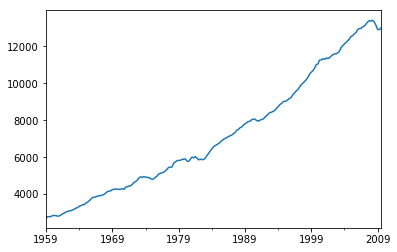

In [16]:
df['realgdp'].plot()

## Using the Hodrick-Prescott Filter for trend analysis

In [17]:
result = sm.tsa.filters.hpfilter(df['realgdp'])
result

(1959-03-31     39.511915
 1959-06-30     80.088532
 1959-09-30     48.875455
 1959-12-31     30.591933
 1960-03-31     64.882667
 1960-06-30     23.040242
 1960-09-30     -1.355312
 1960-12-31    -67.462365
 1961-03-31    -81.367438
 1961-06-30    -60.167890
 1961-09-30    -46.369224
 1961-12-31    -20.695339
 1962-03-31     -2.162153
 1962-06-30     -4.718648
 1962-09-30    -13.556457
 1962-12-31    -44.369262
 1963-03-31    -43.320274
 1963-06-30    -44.546971
 1963-09-30    -26.298758
 1963-12-31    -44.261196
 1964-03-31    -14.434412
 1964-06-30    -20.266867
 1964-09-30    -19.137001
 1964-12-31    -54.824590
 1965-03-31    -15.962445
 1965-06-30    -13.740115
 1965-09-30     13.254828
 1965-12-31     56.030402
 1966-03-31    103.074337
 1966-06-30     72.175348
                  ...    
 2002-06-30    -95.260035
 2002-09-30   -114.798768
 2002-12-31   -190.025905
 2003-03-31   -221.225647
 2003-06-30   -207.139428
 2003-09-30    -89.685415
 2003-12-31    -61.895316
 2004-03-31 

In [18]:
type(result)

tuple

In [19]:
type(result[0])

pandas.core.series.Series

In [20]:
type(result[1])

pandas.core.series.Series

In [22]:
gdp_cycle, gdp_trend = result
df['trend'] = gdp_trend

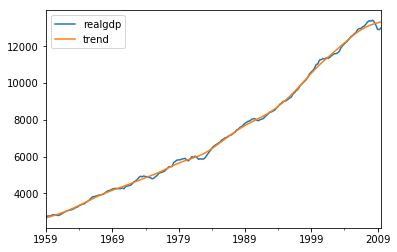

In [24]:
df[['realgdp', 'trend']].plot()

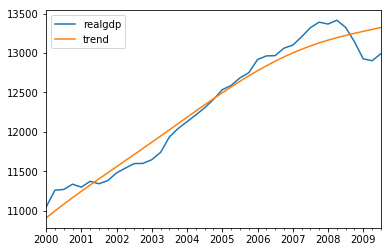

In [26]:
# zooming in
df[['realgdp', 'trend']]['2000-03-31':].plot()

# ETS Theory (Error-Trend-Seasonality)

* Exponential Smoothing
* Trend Methods Models
* ETS Decomposition

# EWMA Theory 
# (Exponentially Weighted Moving Averages)

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
airline = pd.read_csv('airline_passengers.csv', index_col = 'Month')
airline.head()

,Thousands of Passengers
Month,
1949-01,112.0
1949-02,118.0
1949-03,132.0
1949-04,129.0
1949-05,121.0


In [36]:
# this is a normal index
airline.index

Index(['1949-01', '1949-02', '1949-03', '1949-04', '1949-05', '1949-06',
       '1949-07', '1949-08', '1949-09', '1949-10',
       ...
       '1960-04', '1960-05', '1960-06', '1960-07', '1960-08', '1960-09',
       '1960-10', '1960-11', '1960-12',
       'International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60'],
      dtype='object', name='Month', length=145)

In [37]:
# Get rid of all the missing values in this dataset
airline.dropna(inplace=True)

In [38]:
airline.index = pd.to_datetime(airline.index)
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


In [39]:
# now its a DatetimeIndex
airline.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [40]:
# Recap of making the SMA
airline['6-month-SMA'] = airline['Thousands of Passengers'].rolling(window=6).mean()
airline['12-month-SMA'] = airline['Thousands of Passengers'].rolling(window=12).mean()

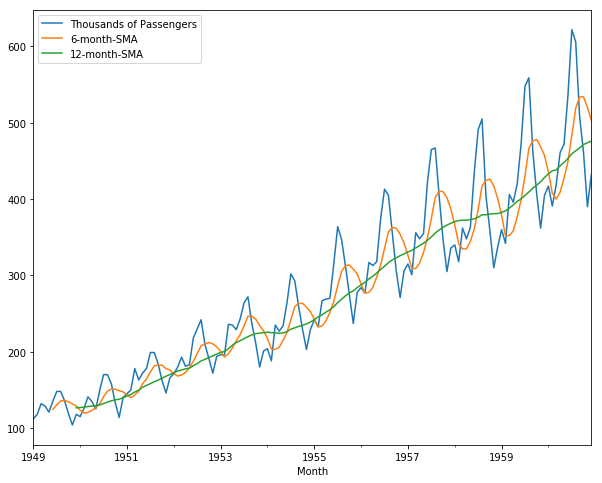

In [41]:
airline.plot(figsize=(10,8))

Weakness of SMA
* Smaller windows will lead to more noise, rather than signal
* It will always lag by the size of the window
* It will never reach to full peak or valley of the data due to the averaging.
* Does not really inform you about possible future behaviour, all it really does is describe trends in your data.
* Extreme historical values can skew your SMA significantly

### Creating EWMA

In [42]:
airline['EWMA-12'] = airline['Thousands of Passengers'].ewm(span=12).mean()

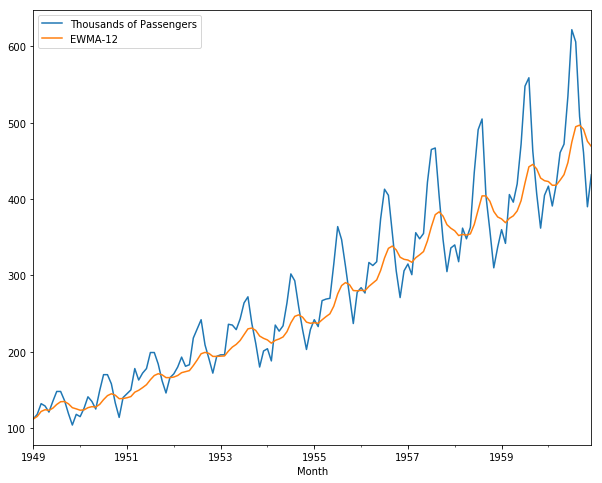

In [44]:
airline[['Thousands of Passengers', 'EWMA-12']].plot(figsize=(10,8))

Full reading on mathematics of EWMA
* http://pandas.pydata.org/pandas-docs/stable/computation.html#exponentially-weighted-windows

# ETS continued...

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
airline = pd.read_csv('airline_passengers.csv', index_col = 'Month')
airline.head()

,Thousands of Passengers
Month,
1949-01,112.0
1949-02,118.0
1949-03,132.0
1949-04,129.0
1949-05,121.0


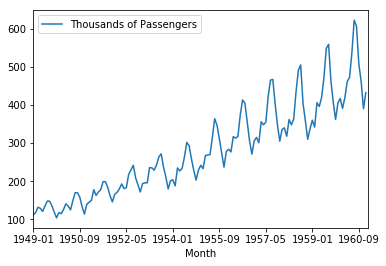

In [5]:
airline.plot()

In [6]:
airline.dropna(inplace = True)

In [7]:
airline.index = pd.to_datetime(airline.index)
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

e:\Anaconda3\envs\pyfinance\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [10]:
# additive/ multiplicative models available
# suspected linear trend = use additive
# suspected non-linear trend = multiplicative model
result = seasonal_decompose(airline['Thousands of Passengers'], model='multiplicative')

In [11]:
result.seasonal

Month
1949-01-01    0.910230
1949-02-01    0.883625
1949-03-01    1.007366
1949-04-01    0.975906
1949-05-01    0.981378
1949-06-01    1.112776
1949-07-01    1.226556
1949-08-01    1.219911
1949-09-01    1.060492
1949-10-01    0.921757
1949-11-01    0.801178
1949-12-01    0.898824
1950-01-01    0.910230
1950-02-01    0.883625
1950-03-01    1.007366
1950-04-01    0.975906
1950-05-01    0.981378
1950-06-01    1.112776
1950-07-01    1.226556
1950-08-01    1.219911
1950-09-01    1.060492
1950-10-01    0.921757
1950-11-01    0.801178
1950-12-01    0.898824
1951-01-01    0.910230
1951-02-01    0.883625
1951-03-01    1.007366
1951-04-01    0.975906
1951-05-01    0.981378
1951-06-01    1.112776
                ...   
1958-07-01    1.226556
1958-08-01    1.219911
1958-09-01    1.060492
1958-10-01    0.921757
1958-11-01    0.801178
1958-12-01    0.898824
1959-01-01    0.910230
1959-02-01    0.883625
1959-03-01    1.007366
1959-04-01    0.975906
1959-05-01    0.981378
1959-06-01    1.112776
1959-

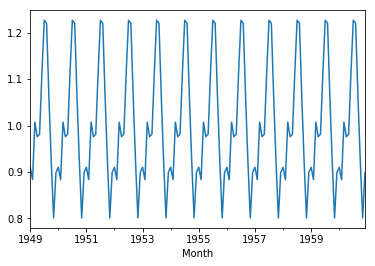

In [12]:
result.seasonal.plot()

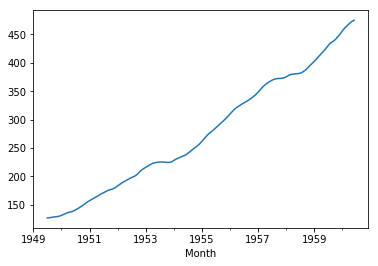

In [13]:
result.trend.plot()

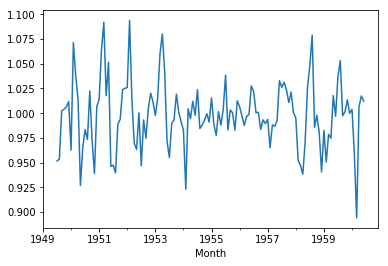

In [14]:
result.resid.plot()

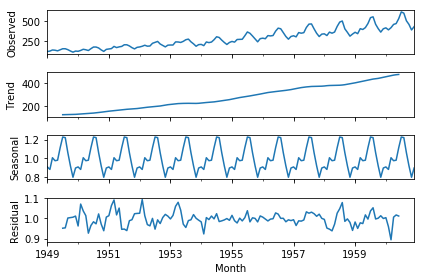

In [17]:
fig = result.plot()

# ARIMA models 
# Auto regressive integrated moving averages
[https://people.duke.edu/~rnau/411arim3.htm]

* **Autoregressive integrated moving average (ARIMA)** model is a generalization of an autoregressive moving average (ARMA) model.

* ARIMA model types
    - **Non-seasonal ARIMA (for non-seasonal data)**
    - **Seasonal ARIMA (for seasonal data)**

* ARIMA models are applied in some cases where data show evidence of non-stationarity, where an initial differencing step (corresponding to the 'integrated' part of the model) can be applied one or more times to eliminate the non-stationarity.

* **Non-seasonal ARIMA models are generally denoted as ARIMA(p, d, q)** where parameters p, d and q are non-negative integers.

* **AR(p): Autoregression component**
    - A regression model that utilizes the dependent relationship between a current observation and observations over a previous period.
* **I(d): Integrated**
    - Differencing of observations (subtracting an observation from an observation at the previous time step) in order to make the time series stationary.
* **MA(q): Moving Average**
    - A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations

### Stationary vs Non-Stationary Data

* A stationary series has a constant mean and variance over time
* A stationary dataset will allow our model to predict that the mean and variance will be the same in future periods.

___

<img src='stationaryvsnonstationary.png' />
___

* Note above for stationary data (mean and variance both are constant over time)
* Another aspect to look for is covariance not be a function of time in stationary data

* If you've determined your data is not stationary (either visually or mathematically), you will then need to transform it to be stationary in order to evaluate it and what type of ARIMA terms you will use.
* One simple way to do this is through **"differencing"**

* Original Data
<table>
<tr><td>Time1</td><td>10</td></tr>
<tr><td>Time2</td><td>12</td></tr>
<tr><td>Time3</td><td>8</td></tr>
<tr><td>Time4</td><td>14</td></tr>
<tr><td>Time5</td><td>7</td></tr>
</table>

* First Difference
<table>
<tr><td>Time1</td><td>NA</td></tr>
<tr><td>Time2</td><td>2</td></tr>
<tr><td>Time3</td><td>-4</td></tr>
<tr><td>Time4</td><td>6</td></tr>
<tr><td>Time5</td><td>-7</td></tr>
</table>

* Second Difference
<table>
<tr><td>Time1</td><td>NA</td></tr>
<tr><td>Time2</td><td>NA</td></tr>
<tr><td>Time3</td><td>-6</td></tr>
<tr><td>Time4</td><td>10</td></tr>
<tr><td>Time5</td><td>-13</td></tr>
</table>

* **For seasonal data,** you can also difference by season. If you had monthly data with yearly seasonality, you could difference by a time unit of 12, instead of just 1.

* Another common techinique with seasonal ARIMA models is to combine both methods, taking the seasonal difference of the first difference.

# ARIMA models continued... 1

The general process for ARIMA models is the following:
* Visualize the Time Series Data
* Make the time series data stationary
* Plot the Correlation and AutoCorrelation Charts
* Construct the ARIMA Model
* Use the model to make predictions

Let's go through these steps!
[https://people.duke.edu/~rnau/arimrule.htm]

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

e:\Anaconda3\envs\pyfinance\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
df = pd.read_csv('monthly-milk-production-pounds-p.csv')
df.head()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [4]:
df.columns = ['Month', 'Milk in Pounds per Cow']
df.head()

,Month,Milk in Pounds per Cow
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [5]:
df.tail()

,Month,Milk in Pounds per Cow
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0
168,Monthly milk production: pounds per cow. Jan 6...,NaN


In [6]:
df.drop(168, axis=0, inplace=True)
df.tail()

,Month,Milk in Pounds per Cow
163,1975-08,858.0
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0


In [7]:
df['Month'] = pd.to_datetime(df['Month'])
df.head()

,Month,Milk in Pounds per Cow
0,1962-01-01,589.0
1,1962-02-01,561.0
2,1962-03-01,640.0
3,1962-04-01,656.0
4,1962-05-01,727.0


In [8]:
df.set_index('Month', inplace=True)
df.head()

,Milk in Pounds per Cow
Month,
1962-01-01,589.0
1962-02-01,561.0
1962-03-01,640.0
1962-04-01,656.0
1962-05-01,727.0


In [9]:
df.index

DatetimeIndex(['1962-01-01', '1962-02-01', '1962-03-01', '1962-04-01',
               '1962-05-01', '1962-06-01', '1962-07-01', '1962-08-01',
               '1962-09-01', '1962-10-01',
               ...
               '1975-03-01', '1975-04-01', '1975-05-01', '1975-06-01',
               '1975-07-01', '1975-08-01', '1975-09-01', '1975-10-01',
               '1975-11-01', '1975-12-01'],
              dtype='datetime64[ns]', name='Month', length=168, freq=None)

In [10]:
df.describe()

,Milk in Pounds per Cow
count,168.000000
mean,754.708333
std,102.204524
min,553.000000
25%,677.750000
50%,761.000000
75%,824.500000
max,969.000000


In [11]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Milk in Pounds per Cow,168.0,754.708333,102.204524,553.0,677.75,761.0,824.5,969.0


### Step 1 - Visualize the data

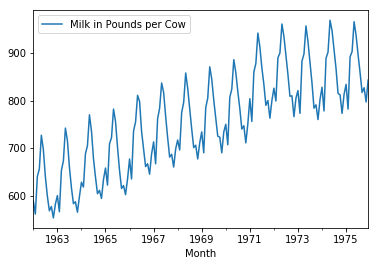

In [13]:
df.plot();

In [14]:
time_series = df['Milk in Pounds per Cow']
type(time_series)

pandas.core.series.Series

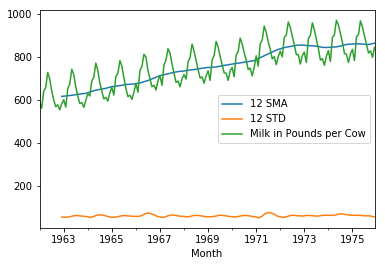

In [21]:
time_series.rolling(12).mean().plot(label='12 SMA')
time_series.rolling(12).std().plot(label='12 STD')
time_series.plot()
plt.legend();

### Conclusion: The scale of STD (standard deviation) is always pretty much smaller than the actual scale. If 12 STD does not show crazy behaviour is comparitively flat then its 'workable'

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose

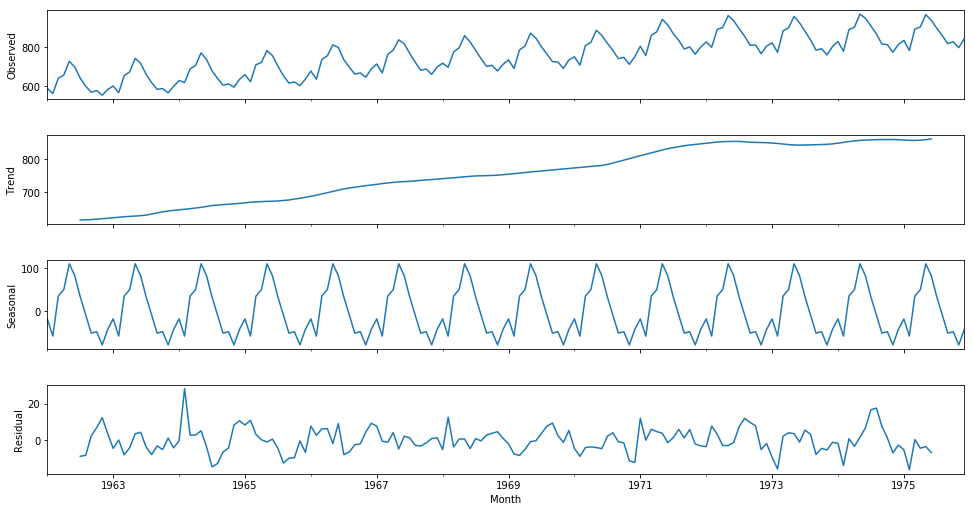

In [26]:
decomp = seasonal_decompose(time_series)
fig = decomp.plot()
fig.set_size_inches(15,8)

# ARIMA models continued... 2

 ### Step 2 - Make the time series data stationary (if non-stationary)

We can use the Augmented [Dickey-Fuller](https://en.wikipedia.org/wiki/Augmented_Dickey%E2%80%93Fuller_test) [unit root test](https://en.wikipedia.org/wiki/Unit_root_test).

In statistics and econometrics, an augmented Dickey–Fuller test (ADF) tests the null hypothesis that a unit root is present in a time series sample. The alternative hypothesis is different depending on which version of the test is used, but is usually stationarity or trend-stationarity.

Basically, we are trying to whether to accept the Null Hypothesis **H0** (that the time series has a unit root, indicating it is non-stationary) or reject **H0** and go with the Alternative Hypothesis (that the time series has no unit root and is stationary).

We end up deciding this based on the p-value return.

* A small p-value (typically ≤ 0.05) indicates strong evidence against the null hypothesis, so you reject the null hypothesis.

* A large p-value (> 0.05) indicates weak evidence against the null hypothesis, so you fail to reject the null hypothesis.

Let's run the Augmented Dickey-Fuller test on our data:

In [27]:
from statsmodels.tsa.stattools import adfuller

In [30]:
result = adfuller(df['Milk in Pounds per Cow'])
result

(-1.303811587422125,
 0.62742670860303362,
 13,
 154,
 {'1%': -3.4735425281962091,
  '10%': -2.5768780536346769,
  '5%': -2.880497674144038},
 1115.1730447395112)

In [33]:
def adf_check(time_series):
    result = adfuller(time_series)
    print('Augumented Dicky-Fuller Test')
    labels = ['ADF Test Statistic', 'p-value', '# of lags', 'Num of Observations used']
    for value, label in zip(result, labels):
        print(label + ': ' + str(value))
        
    if result[1] < 0.05:
        print('Strong evidence against null hypothesis')
        print('Rejecting null hypothesis')
        print('Data has no unit root! and is stationary')
    else:
        print('Weak evidence against null hypothesis')
        print('Fail to reject null hypothesis')
        print('Data has a unit root, it is non-stationary')

In [34]:
adf_check(df['Milk in Pounds per Cow'])

Augumented Dicky-Fuller Test
ADF Test Statistic: -1.30381158742
p-value: 0.627426708603
# of lags: 13
Num of Observations used: 154
Weak evidence against null hypothesis
Fail to reject null hypothesis
Data has a unit root, it is non-stationary


* Thus, the ADF test confirms our assumption from visual analysis that definately the data is non-stationary and has a seasionality and trend factor to it.

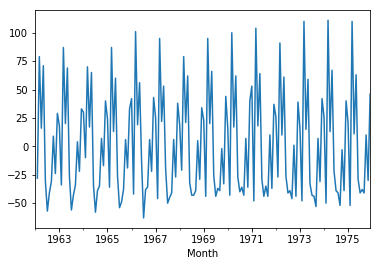

In [37]:
# Now making the data stationary
df['First Difference'] = df['Milk in Pounds per Cow'] - df['Milk in Pounds per Cow'].shift(1)
df['First Difference'].plot()

In [42]:
# adf_check(df['First Difference']) - THIS RESULTS IN LinAlgError: SVD did not converge ERROR

In [39]:
# Note: we need to drop the first NA value before plotting this
adf_check(df['First Difference'].dropna())

Augumented Dicky-Fuller Test
ADF Test Statistic: -3.05499555865
p-value: 0.0300680040018
# of lags: 14
Num of Observations used: 152
Strong evidence against null hypothesis
Rejecting null hypothesis
Data has no unit root! and is stationary


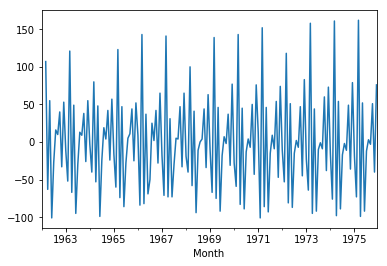

In [41]:
df['Second Difference'] = df['First Difference'] - df['First Difference'].shift(1)
df['Second Difference'].plot();

In [43]:
adf_check(df['Second Difference'].dropna())

Augumented Dicky-Fuller Test
ADF Test Statistic: -14.3278736456
p-value: 1.11269893321e-26
# of lags: 11
Num of Observations used: 154
Strong evidence against null hypothesis
Rejecting null hypothesis
Data has no unit root! and is stationary


* Since, **p-value('Original') - p-value('First Difference') < p-value('First Difference') - p-value('Second Difference')**, it is the first difference that did most of the elimination of the trend.

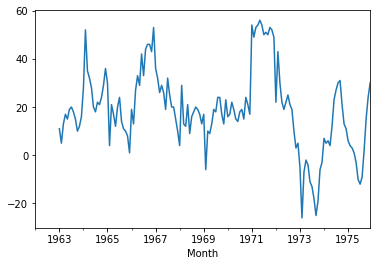

In [45]:
# Let's plot seasonal difference
df['Seasonal Difference'] = df['Milk in Pounds per Cow'] - df['Milk in Pounds per Cow'].shift(12)
df['Seasonal Difference'].plot();

In [46]:
adf_check(df['Seasonal Difference'].dropna())

Augumented Dicky-Fuller Test
ADF Test Statistic: -2.33541931436
p-value: 0.160798805277
# of lags: 12
Num of Observations used: 143
Weak evidence against null hypothesis
Fail to reject null hypothesis
Data has a unit root, it is non-stationary


 * Thus, we conclude that seasonal difference *does not make* the data stationary here, **in fact we can observe visually that as we go further in time the variance began to increase**.

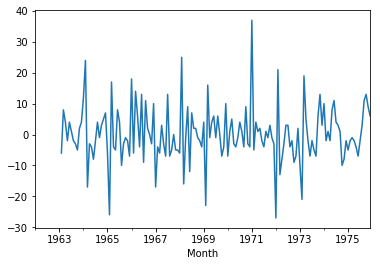

In [48]:
# Plotting 'Seasonal first difference'
df['Seasonal First Difference'] = df['First Difference'] - df['First Difference'].shift(12)
df['Seasonal First Difference'].plot();

In [49]:
adf_check(df['Seasonal First Difference'].dropna())

Augumented Dicky-Fuller Test
ADF Test Statistic: -5.03800227492
p-value: 1.86542343188e-05
# of lags: 11
Num of Observations used: 143
Strong evidence against null hypothesis
Rejecting null hypothesis
Data has no unit root! and is stationary


# ARIMA models continued... 3

 ### Step 3 - Plot the Correlation and Autocorrelation Charts

In [50]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

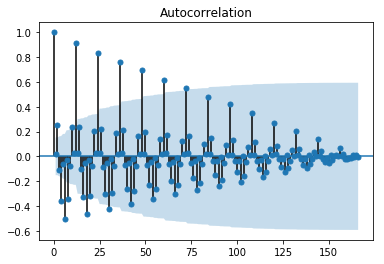

In [52]:
# Plotting the gradual decline autocorrelation
fig_first = plot_acf(df['First Difference'].dropna())

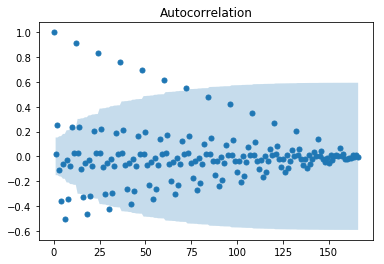

In [54]:
fig_first = plot_acf(df['First Difference'].dropna(), use_vlines=False)

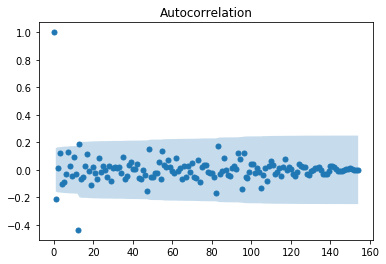

In [55]:
fig_seasonal_first = plot_acf(df['Seasonal First Difference'].dropna(), use_vlines=False)

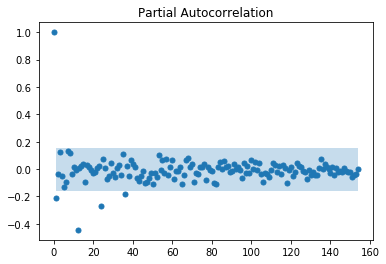

In [56]:
fig_seasonal_first_pacf = plot_pacf(df['Seasonal First Difference'].dropna(), use_vlines=False)

#### Plotting the final 'Autocorrelation' and 'Partial autocorrelation'

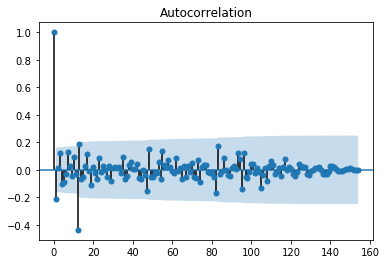

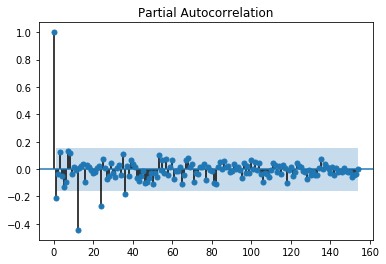

In [78]:
plot_acf(df['Seasonal First Difference'].dropna());
plot_pacf(df['Seasonal First Difference'].dropna());

# ARIMA models continued... 4

 ### Step 4 - Construct the ARIMA model

In [64]:
# ARIMA model for non-sesonal data
from statsmodels.tsa.arima_model import ARIMA

In [65]:
# help(ARIMA)

In [66]:
# ARIMA model from seasonal data
# from statsmodels.tsa.statespace import sarimax

Choosing the **p, d, q values** of the **order** and **seasonal_order** tuple is reading task

More information here...

[https://stackoverflow.com/questions/22770352/auto-arima-equivalent-for-python]

[https://stats.stackexchange.com/questions/44992/what-are-the-values-p-d-q-in-arima]

[https://people.duke.edu/~rnau/arimrule.htm]

In [68]:
model = sm.tsa.statespace.SARIMAX(df['Milk in Pounds per Cow'], order=(0,1,0), seasonal_order=(1,1,1,12))

In [69]:
results = model.fit()

In [70]:
print(results.summary())

                                 Statespace Model Results                                 
Dep. Variable:             Milk in Pounds per Cow   No. Observations:                  168
Model:             SARIMAX(0, 1, 0)x(1, 1, 1, 12)   Log Likelihood                -534.065
Date:                            Sat, 07 Oct 2017   AIC                           1074.131
Time:                                    18:26:40   BIC                           1083.503
Sample:                                01-01-1962   HQIC                          1077.934
                                     - 12-01-1975                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.0449      0.106     -0.422      0.673      -0.253       0.163
ma.S.L12      -0.5860      0.102   

In [75]:
# residual errors of prediction on the original training data
results.resid

Month
1962-01-01    589.000000
1962-02-01    -28.000000
1962-03-01     79.000000
1962-04-01     16.000000
1962-05-01     71.000000
1962-06-01    -30.000000
1962-07-01    -57.000000
1962-08-01    -41.000000
1962-09-01    -31.000000
1962-10-01      9.000000
1962-11-01    -24.000000
1962-12-01     29.000000
1963-01-01   -276.500828
1963-02-01     -6.001008
1963-03-01      8.002845
1963-04-01      4.000576
1963-05-01     -1.997443
1963-06-01      3.998920
1963-07-01      0.997947
1963-08-01     -2.001476
1963-09-01     -3.001116
1963-10-01     -4.999676
1963-11-01      1.999136
1963-12-01      4.001044
1964-01-01     11.980057
1964-02-01     21.216675
1964-03-01    -13.288272
1964-04-01     -1.144490
1964-05-01     -4.926563
1964-06-01     -6.145184
                 ...    
1973-07-01      0.055591
1973-08-01     -6.173488
1973-09-01     -9.576142
1973-10-01      2.410388
1973-11-01      6.632801
1973-12-01      3.259519
1974-01-01      0.696325
1974-02-01     -9.375287
1974-03-01     10.3

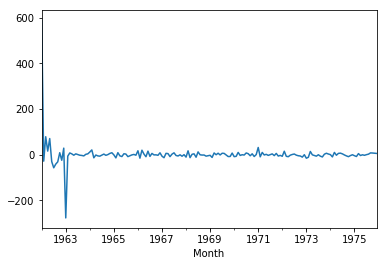

In [76]:
# plot of residual errors of prediction on the original training data
results.resid.plot();

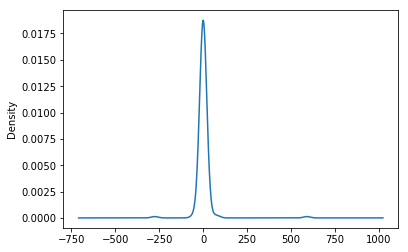

In [77]:
# KDE plot of residual errors of prediction on the original training data
results.resid.plot(kind='kde');

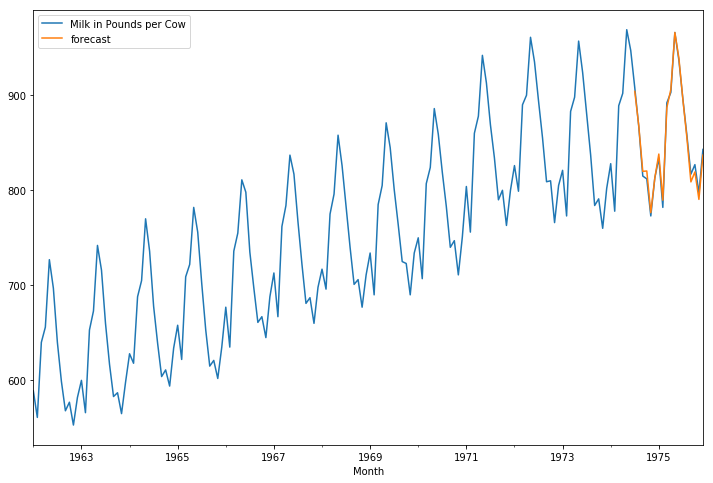

In [82]:
# Creating a column forecast to house the forecasted values for existing values
df['forecast'] = results.predict(start=150, end=168)
df[['Milk in Pounds per Cow', 'forecast']].plot(figsize=(12,8));

In [84]:
# Forecasting for future data
df.tail()

,Milk in Pounds per Cow,First Difference,Second Difference,Seasonal Difference,Seasonal First Difference,forecast
Month,,,,,,
1975-08-01,858.0,-38.0,3.0,-9.0,3.0,855.358617
1975-09-01,817.0,-41.0,-3.0,2.0,11.0,808.841268
1975-10-01,827.0,10.0,51.0,15.0,13.0,819.323183
1975-11-01,797.0,-30.0,-40.0,24.0,9.0,790.427500
1975-12-01,843.0,46.0,76.0,30.0,6.0,837.063646


In [85]:
from pandas.tseries.offsets import DateOffset

In [86]:
future_dates = [df.index[-1] + DateOffset(months=x) for x in range(0,24)]
future_dates

[Timestamp('1975-12-01 00:00:00'),
 Timestamp('1976-01-01 00:00:00'),
 Timestamp('1976-02-01 00:00:00'),
 Timestamp('1976-03-01 00:00:00'),
 Timestamp('1976-04-01 00:00:00'),
 Timestamp('1976-05-01 00:00:00'),
 Timestamp('1976-06-01 00:00:00'),
 Timestamp('1976-07-01 00:00:00'),
 Timestamp('1976-08-01 00:00:00'),
 Timestamp('1976-09-01 00:00:00'),
 Timestamp('1976-10-01 00:00:00'),
 Timestamp('1976-11-01 00:00:00'),
 Timestamp('1976-12-01 00:00:00'),
 Timestamp('1977-01-01 00:00:00'),
 Timestamp('1977-02-01 00:00:00'),
 Timestamp('1977-03-01 00:00:00'),
 Timestamp('1977-04-01 00:00:00'),
 Timestamp('1977-05-01 00:00:00'),
 Timestamp('1977-06-01 00:00:00'),
 Timestamp('1977-07-01 00:00:00'),
 Timestamp('1977-08-01 00:00:00'),
 Timestamp('1977-09-01 00:00:00'),
 Timestamp('1977-10-01 00:00:00'),
 Timestamp('1977-11-01 00:00:00')]

In [87]:
future_df = pd.DataFrame(index=future_dates, columns=df.columns)
future_df.head()

,Milk in Pounds per Cow,First Difference,Second Difference,Seasonal Difference,Seasonal First Difference,forecast
1975-12-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-01-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-02-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-03-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-04-01,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
final_df = pd.concat([df, future_df])
final_df.head()

,Milk in Pounds per Cow,First Difference,Second Difference,Seasonal Difference,Seasonal First Difference,forecast
1962-01-01,589.0,NaN,NaN,NaN,NaN,NaN
1962-02-01,561.0,-28.0,NaN,NaN,NaN,NaN
1962-03-01,640.0,79.0,107.0,NaN,NaN,NaN
1962-04-01,656.0,16.0,-63.0,NaN,NaN,NaN
1962-05-01,727.0,71.0,55.0,NaN,NaN,NaN


In [90]:
final_df.tail()

,Milk in Pounds per Cow,First Difference,Second Difference,Seasonal Difference,Seasonal First Difference,forecast
1977-07-01,NaN,NaN,NaN,NaN,NaN,NaN
1977-08-01,NaN,NaN,NaN,NaN,NaN,NaN
1977-09-01,NaN,NaN,NaN,NaN,NaN,NaN
1977-10-01,NaN,NaN,NaN,NaN,NaN,NaN
1977-11-01,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
final_df['forecast'] = results.predict(start=168, end=192)
final_df.tail()

,Milk in Pounds per Cow,First Difference,Second Difference,Seasonal Difference,Seasonal First Difference,forecast
1977-07-01,NaN,NaN,NaN,NaN,NaN,951.525751
1977-08-01,NaN,NaN,NaN,NaN,NaN,911.918840
1977-09-01,NaN,NaN,NaN,NaN,NaN,865.881041
1977-10-01,NaN,NaN,NaN,NaN,NaN,871.027162
1977-11-01,NaN,NaN,NaN,NaN,NaN,836.962873


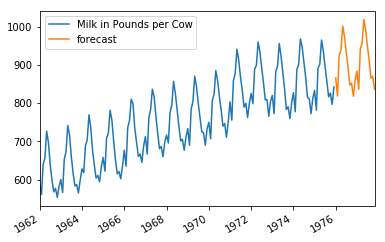

In [93]:
final_df[['Milk in Pounds per Cow', 'forecast']].plot()

* **Why ARIMA Models are questioning when it comes to financial forecasting?**

Lot of this stuff assumes that the y-axis value (price) is directly connected to the time (x-axis value) and that the time is really important aspect of the y value.

While that is true for financial series it discounts the **external force** i.e. traders also able to buy and sell securities outside the market and affect its price.

And because of that often you'll hear stock and securities prices are following some sort of **Brownian motion** almost like a random walk.

Because of those aspects of the financial and securities data this sort of forecsting method *doesn't really work with stock*.